In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# a artificial
a_values = pd.read_csv('../../input_data/a/a_values.csv', sep=';', header=None)
#a_rep_gui = pd.read_csv('output/discr_hat_transformer_10_missing_TRANSPOSED.csv', sep=';', header=0)

# b artificial
b_values = pd.read_csv('../../input_data/b/b_values.csv', sep=';', header=None)
#b_rep_gui = pd.read_csv('output/diff_transformer_10_missing.csv', sep=';', header=0)

# theta artificial
theta_values = pd.read_csv('../../input_data/theta/theta_values.csv', sep=';', header=None)
#theta_rep_gui = pd.read_csv('output/thetas_transformer_10_missing.csv', sep=';', header=0)

## Discriminations

In [3]:
a_results = pd.DataFrame(columns=['a_values'])

a_results['a_values'] = a_values

cols = ['Rep' + str(i+1) for i in range(100)]

for i in range(100):
    rep = np.genfromtxt('a/discr_hat_rep' + str(i+1) + '_jml_50_missing_2.csv', delimiter=';').transpose().flatten()
    rep = rep[rep != 0]

    a_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90013/3832346673.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  a_results['Rep' + str(i+1)] = rep


In [4]:
a_results['Bias'] = np.sum(a_values.values - a_results[cols].values, axis=1)/100
a_results['RMSE'] = np.sqrt(np.sum((a_values.values - a_results[cols])**2, axis=1)/100)
a_results['Abs Bias'] = np.sum(np.abs(a_values.values - a_results[cols].values), axis=1)/100

In [5]:
corrs = []

for column in cols:
    corrs.append(a_results['a_values'].corr(a_results[column]))

a_results['Corr'] = ""
a_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90013/2534136238.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_results['Corr'][0] = np.mean(corrs, axis=0)


In [6]:
a_results

,a_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,1.232813,1.701489,1.731867,1.630331,1.883586,1.573906,1.644177,1.674991,1.672073,1.665260,...,1.794228,1.527522,1.830241,1.714385,1.680503,1.634735,-0.425991,0.435878,0.425991,0.417442
1,1.134104,1.552854,1.792056,1.524058,1.447831,1.746201,1.632243,1.589964,1.528725,1.508660,...,1.458060,1.506519,1.601284,1.477035,1.650640,1.616838,-0.424479,0.435904,0.424479,
2,1.738586,33.572127,35.099629,33.648055,33.779787,35.185091,31.237619,31.706756,29.570409,36.764731,...,31.322206,34.280248,34.122013,31.585322,35.875178,32.236407,-31.600957,31.702084,31.600957,
3,2.110506,35.181688,33.902042,32.835300,36.876168,33.476069,34.130720,36.361921,33.497668,35.964485,...,34.449011,33.967538,32.713462,33.170530,35.423046,29.327017,-33.731364,33.812161,33.731364,
4,0.770227,9.543242,11.247103,10.518156,10.030165,8.022747,10.457243,11.555472,8.720449,9.380320,...,9.124912,10.533049,11.985699,9.806986,9.481163,10.683541,-8.369229,8.473555,8.369229,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2.280600,41.682729,42.911738,41.732964,41.646434,42.957169,42.459371,41.220359,41.375128,42.851569,...,44.073334,42.114381,43.477862,43.684474,43.411906,42.287337,-40.457523,40.476907,40.457523,
146,0.711949,20.869395,19.028696,23.403215,20.653161,18.187685,22.208617,22.231643,24.063957,13.388884,...,19.685615,20.963011,21.095944,22.179454,19.229760,17.489305,-19.091720,19.296256,19.091720,
147,0.912646,10.673738,5.285964,8.796952,6.376840,9.761017,6.283117,4.733584,4.310890,13.040966,...,4.799491,11.319763,10.047711,8.374366,12.739491,12.957807,-9.297614,9.968705,9.297614,
148,1.041631,11.009938,18.259803,8.304962,11.100357,13.974096,15.367621,14.078783,13.918468,15.940062,...,14.969628,5.996708,14.820039,19.187151,6.905610,15.058475,-12.984757,13.287756,12.984757,


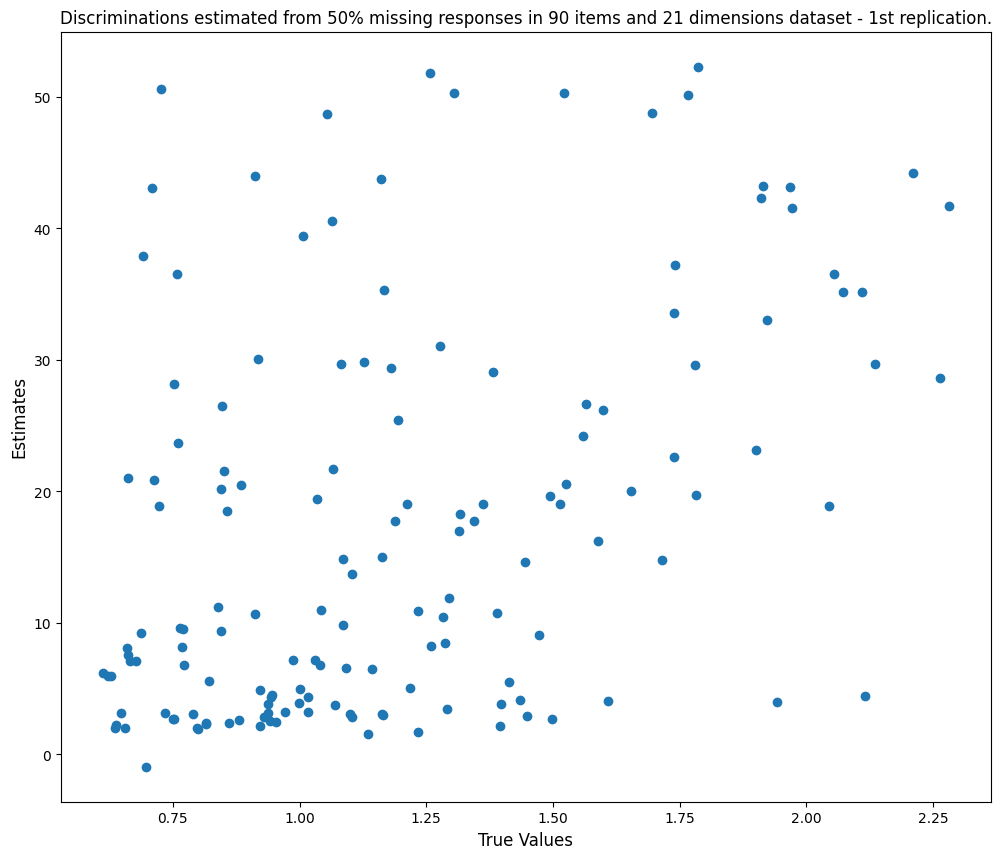

In [7]:
plt.figure(figsize=(12, 10))
plt.scatter(x=a_values.T, y=a_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Discriminations estimated from 50% missing responses in 90 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [8]:
a_results.to_csv('a/a_results.csv', sep=';', header=True, index=False)

## Difficulties

In [9]:
b_results = pd.DataFrame(columns=['b_values'])

b_results['b_values'] = b_values

for i in range(100):
    rep = np.genfromtxt('b/diff_hat_rep' + str(i+1) + '_jml_50_missing_2.csv', delimiter=';')
    b_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90013/3174923373.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  b_results['Rep' + str(i+1)] = rep


In [10]:
b_results['Bias'] = np.sum(b_values.values - b_results[cols].values, axis=1)/100
b_results['RMSE'] = np.sqrt(np.sum((b_values.values - b_results[cols])**2, axis=1)/100)
b_results['Abs Bias'] = np.sum(np.abs(b_values.values - b_results[cols].values), axis=1)/100

In [11]:
corrs = []

for column in cols:
    corrs.append(b_results['b_values'].corr(b_results[column]))

b_results['Corr'] = ""
b_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90013/994335258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_results['Corr'][0] = np.mean(corrs, axis=0)


In [12]:
b_results

,b_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,-1.194972,-1.109453,-1.140554,-1.177855,-1.168384,-1.129176,-1.187771,-1.135985,-1.113833,-1.159343,...,-1.265672,-1.127359,-1.195490,-1.049587,-1.195057,-1.196454,-0.039475,0.057169,0.046042,0.847616
1,1.404483,1.497950,1.518104,1.404568,1.456486,1.680134,1.545692,1.527280,1.562183,1.522285,...,1.445091,1.497594,1.527224,1.605909,1.512242,1.554730,-0.105218,0.117350,0.105337,
2,-1.196988,-1.936978,-3.317544,-1.454066,-1.489220,-1.211788,-1.308817,-1.625438,-1.396600,-1.371490,...,-1.685139,-1.470567,-1.407354,-1.283219,-1.316916,-2.313392,0.229177,0.383161,0.230283,
3,0.472191,0.901693,0.911764,1.753447,2.006085,0.811766,1.250804,0.673187,1.657998,2.220396,...,0.935763,1.476110,0.673979,1.829157,0.929528,0.778874,-0.853902,1.047421,0.853902,
4,1.783818,1.663136,1.801108,1.738697,1.618798,1.398939,1.710067,1.620450,1.733735,2.353336,...,1.894421,1.537904,1.645279,1.556025,2.008320,1.556042,-0.006852,0.382046,0.247564,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.527809,-0.236079,-0.093365,0.076030,-0.430847,0.308830,-0.176369,-0.266022,-0.337451,-0.199278,...,-0.036174,-0.759137,-0.461884,0.040812,-0.253006,-0.049164,0.690654,0.752264,0.691367,
86,-0.749307,-2.056539,-2.162999,-1.924790,-2.000859,-2.208180,-1.844078,-2.037242,-2.054052,-1.991406,...,-2.080364,-2.226632,-2.381289,-2.238173,-1.929054,-2.117093,1.420213,1.435118,1.420213,
87,0.163070,1.195209,0.660489,1.188376,1.411786,1.005719,0.826989,0.817454,0.885433,0.920847,...,0.920022,0.838295,1.240651,1.267104,1.105165,0.851524,-0.903275,0.943983,0.903275,
88,0.928725,1.819742,2.075403,1.702336,2.184969,1.799498,2.160653,2.292744,2.606825,1.608361,...,2.640245,1.489222,1.989805,2.126856,1.800661,1.791044,-0.913522,1.014536,0.939792,


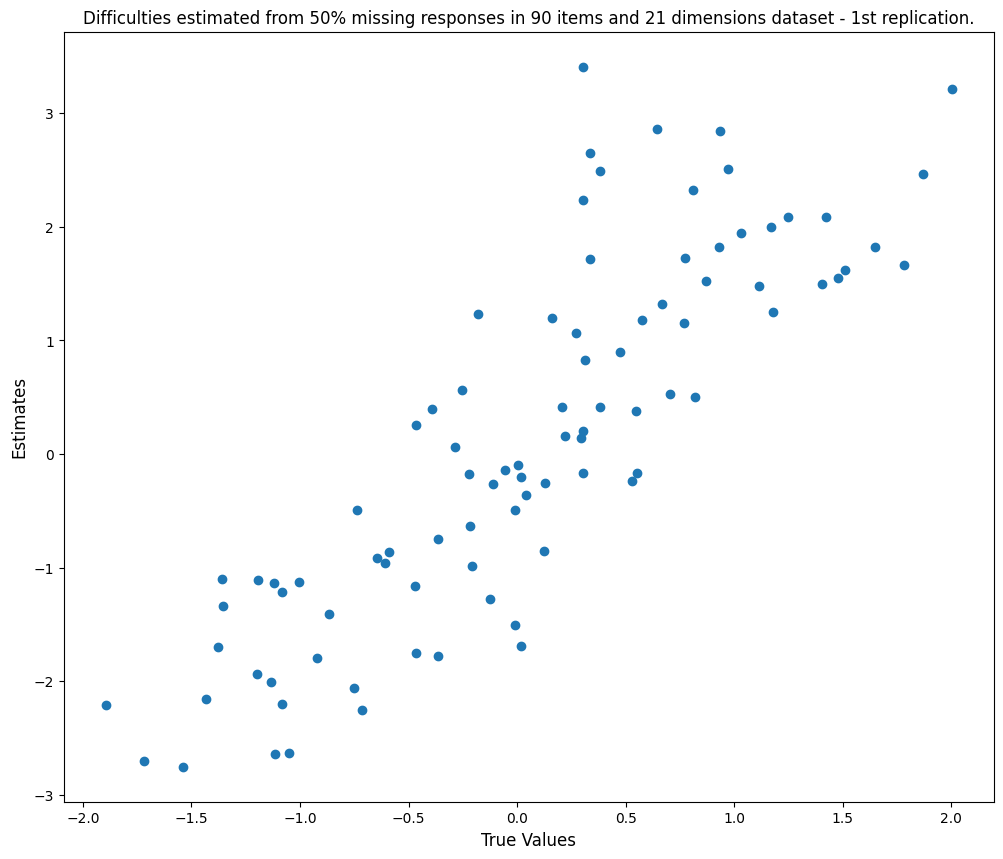

In [13]:
plt.figure(figsize=(12, 10))
plt.scatter(x=b_values.T, y=b_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Difficulties estimated from 50% missing responses in 90 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [14]:
b_results.to_csv('b/b_results.csv', sep=';', header=True, index=False)

## Thetas

In [15]:
theta_values = theta_values.values.reshape((21, 10000))[:, :8000].flatten()

In [17]:
theta_results = pd.DataFrame(columns=['theta_values'])

theta_results['theta_values'] = theta_values

for i in range(100):
    rep = np.genfromtxt('theta/thetas_rep' + str(i+1) + '_jml_50_missing_2.csv', delimiter=';').transpose().flatten()
    theta_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90013/3306603789.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  theta_results['Rep' + str(i+1)] = rep


In [18]:
theta_values = theta_values.reshape((theta_values.shape[0], 1))
theta_results['Bias'] = np.sum(theta_values - theta_results[cols].values, axis=1)/100
theta_results['RMSE'] = np.sqrt(np.sum((theta_values - theta_results[cols].values)**2, axis=1)/100)
theta_results['Abs Bias'] = np.sum(np.abs(theta_values - theta_results[cols].values), axis=1)/100

In [19]:
corrs = []

for column in cols:
    corrs.append(theta_results['theta_values'].corr(theta_results[column]))

theta_results['Corr'] = ""
theta_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90013/604505848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theta_results['Corr'][0] = np.mean(corrs, axis=0)


In [20]:
theta_results

,theta_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,-0.019225,-0.382786,-0.024579,0.132451,-0.239570,-1.581317,0.022427,-0.030655,-0.071167,0.100923,...,-0.418220,-1.289794,-0.117604,-0.254498,0.091085,0.119500,0.210288,0.560805,0.387828,0.503203
1,-1.773350,-1.338555,-0.308203,-0.249678,-0.485578,-1.165019,-0.786913,-0.220448,-0.395484,-0.466200,...,-0.209404,-0.927028,-1.112384,-0.488484,-2.136127,-0.373899,-0.873381,1.025837,0.935655,
2,-0.012759,0.119956,-0.058594,0.116354,0.660402,0.042570,-0.013270,0.194933,0.086796,0.493141,...,-0.208010,-0.151697,0.107350,2.422307,-0.108754,0.282139,-0.313609,0.594271,0.366349,
3,0.032244,-0.171016,0.093221,-0.023801,-0.390281,0.098507,-0.093768,0.056254,0.240943,0.074933,...,-0.053969,0.216842,0.317854,0.520934,-0.083448,-0.061947,0.071568,0.331683,0.239694,
4,-0.712594,-1.181477,-0.519596,-2.023942,-0.445122,-0.856619,-0.219729,-0.319920,0.139919,-0.837864,...,-0.174295,-0.968184,0.179762,-0.246831,-1.637823,-0.737143,-0.265100,0.582616,0.492241,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167995,-0.702055,-0.826916,-0.141690,-0.226316,-0.155240,-0.122355,-0.122912,-0.066446,0.009135,-0.000120,...,-0.981305,-0.094806,-0.324659,-0.510879,-0.643808,-0.137661,-0.673855,0.859725,0.742070,
167996,0.915393,0.055180,0.372041,-0.091396,0.144777,0.579662,0.934510,-0.845698,0.032897,1.434637,...,-0.576479,-1.227953,0.076540,0.046297,-0.413019,1.157502,0.579641,0.853983,0.699889,
167997,-0.994150,0.199684,-2.068426,-2.156607,-0.993482,-0.069040,-0.062772,-1.095600,-1.026410,0.480648,...,-0.072810,0.007713,-1.763745,-0.420598,-0.473916,-1.964817,-0.154027,1.024982,0.893741,
167998,1.004069,1.460929,0.346962,0.032763,-0.005892,0.767293,0.107014,1.352727,0.760702,0.629641,...,1.370576,1.145759,0.323942,1.009401,0.598858,1.962640,0.316840,0.657673,0.542829,


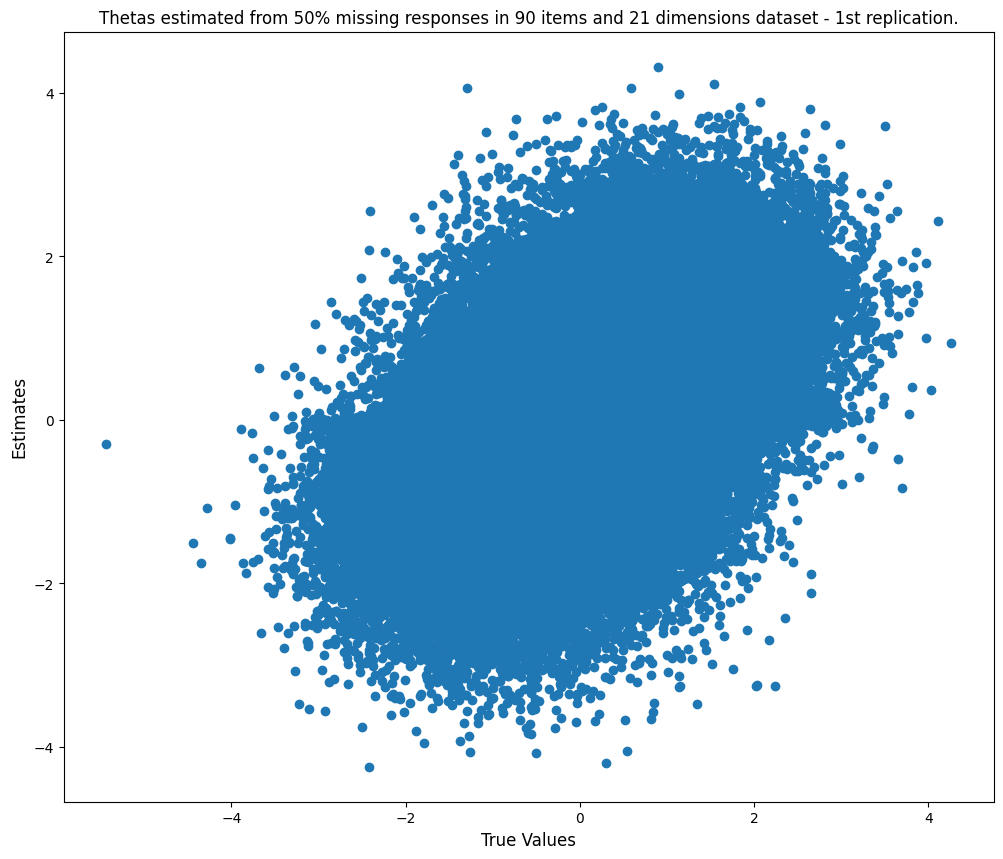

In [21]:
plt.figure(figsize=(12, 10))
plt.scatter(x=theta_values.T, y=theta_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Thetas estimated from 50% missing responses in 90 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [22]:
theta_results.to_csv('theta/theta_results.csv', sep=';', header=True, index=False)